# Introduction to `ospgrid`

`ospgrid` provides a user-friendly interface to OpenSeesPy for the analysis of elastic plane grids.
This tutorial shows its basic use.

In [1]:
# This cell not necessary once ospgrid is installed
import sys
sys.path.append("../../..")

In [2]:
# Basic imports
import ospgrid as ospg  # The main package
from IPython import display  # For images in this notebook

## Example 1
This example is based on the Semester 1 2021 Exam question for the unit *CIV4280 Bridge Design & Assessment* at Monash University, Melbourne.

We consider the following grid, taking the following for all members:

- $EI = 10\times10^3$ kNm2
- $GJ = 5\times 10^3$ kNm2

To keep units consistent, we will maintain forces in kN and distances in m.



In [3]:
grid = ospg.Grid()

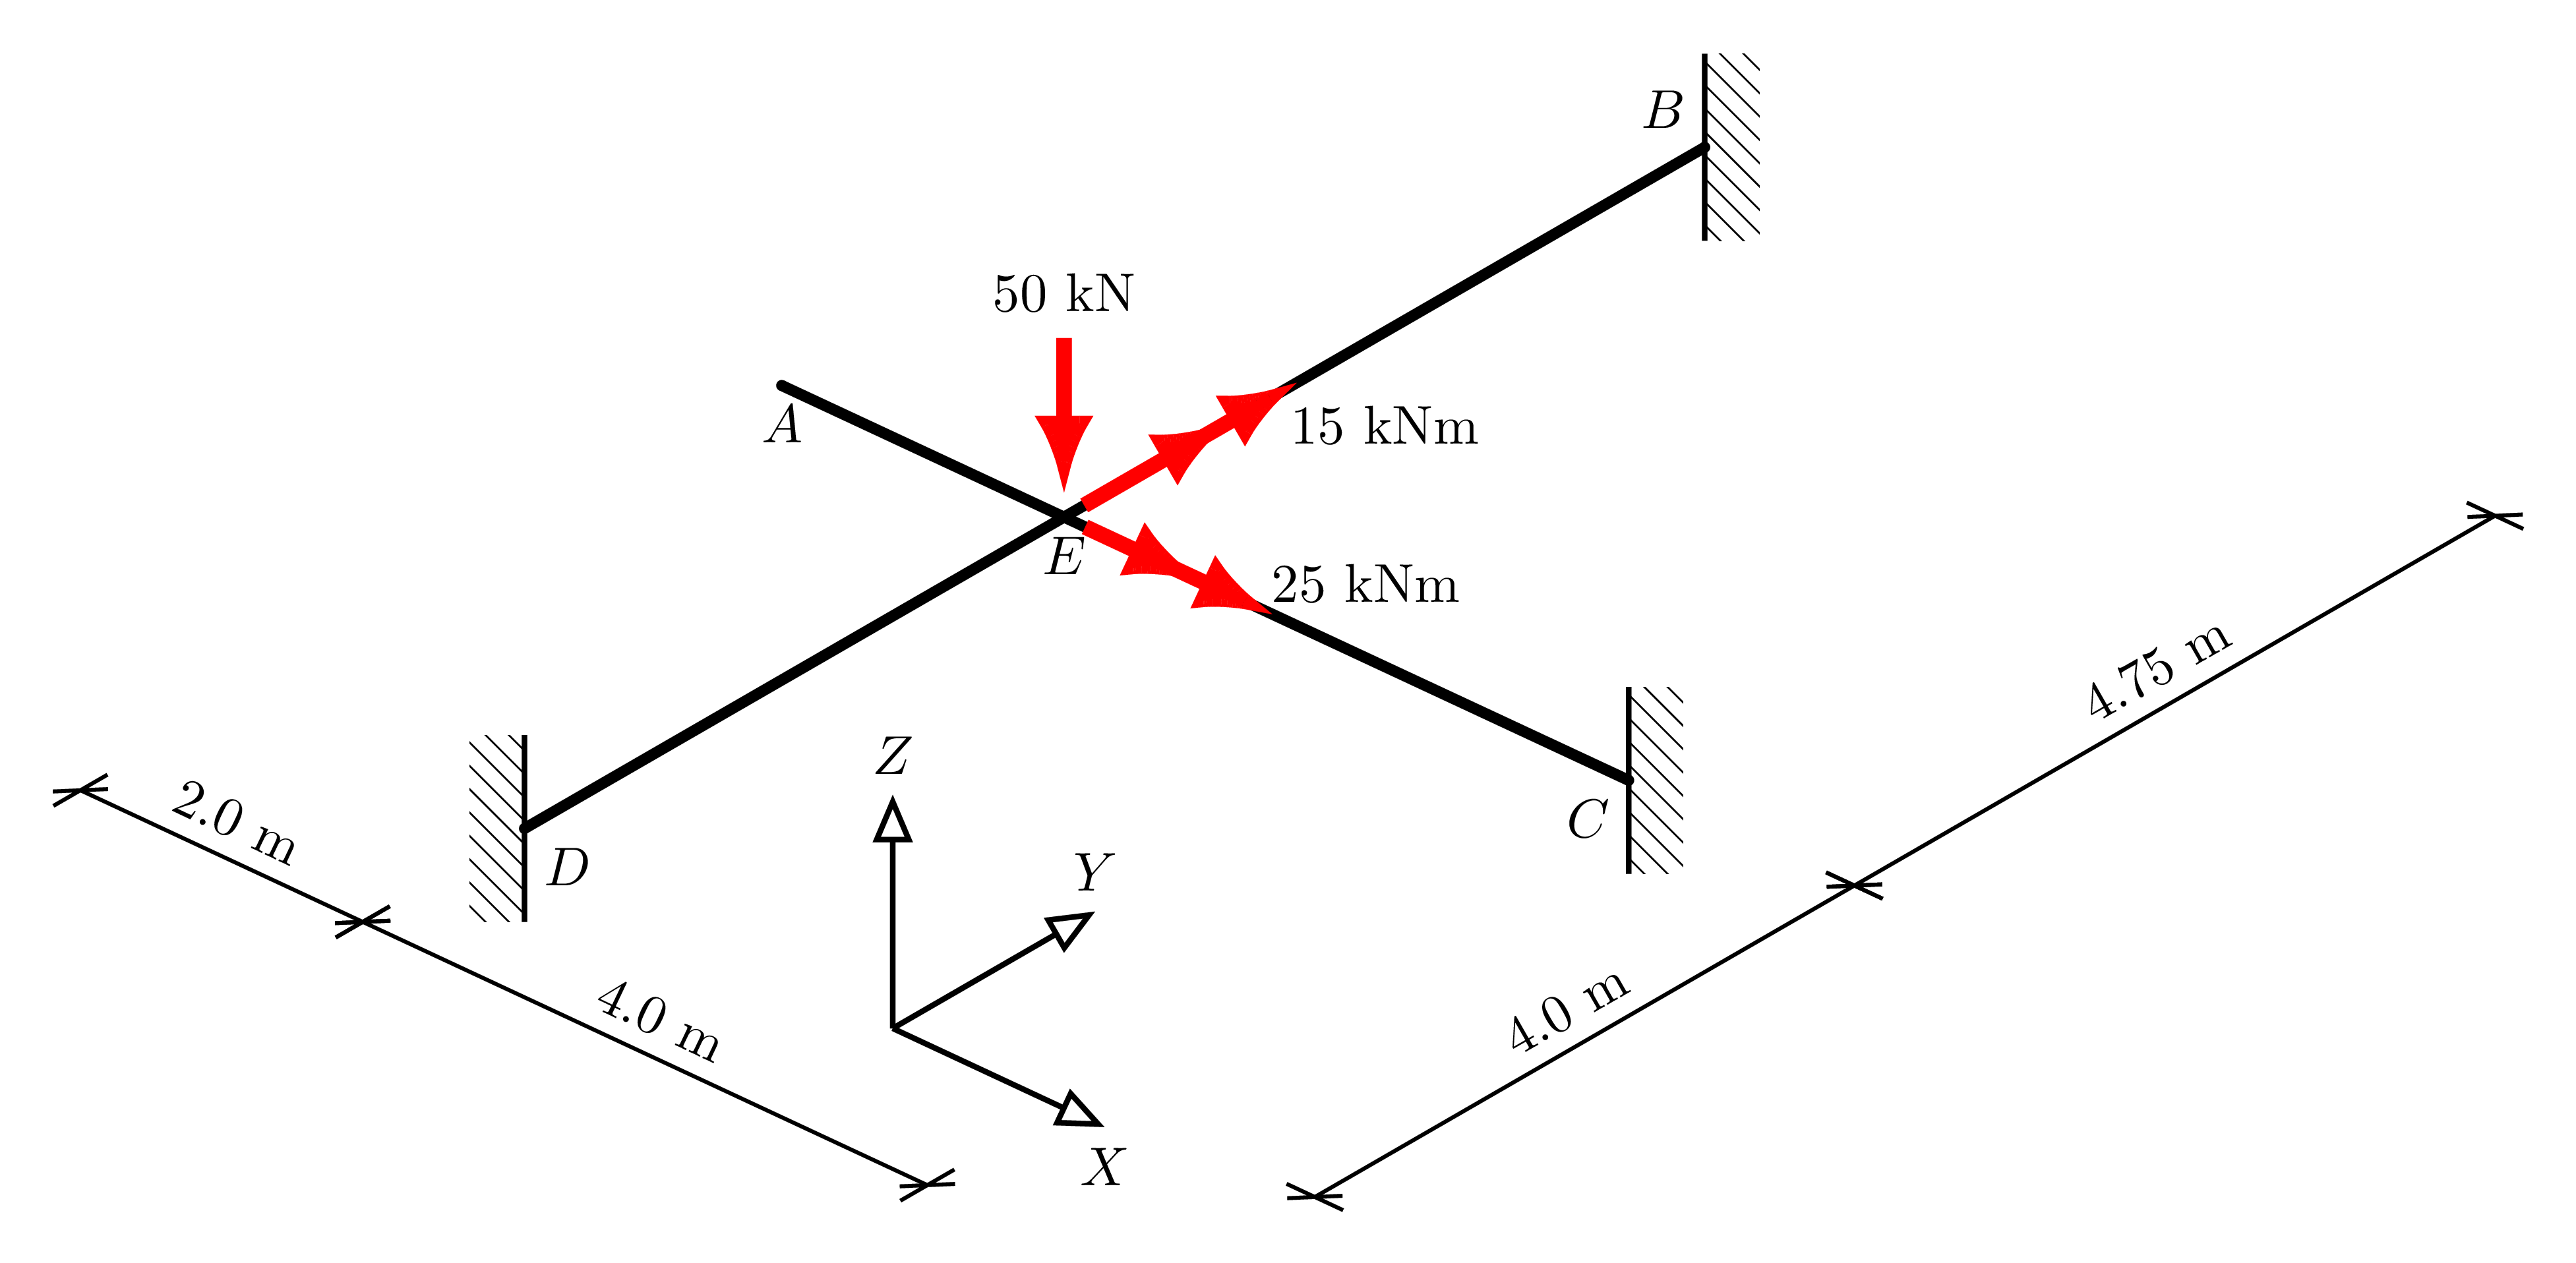

In [4]:
display.Image("./images/example_1.png",width=800)

Taking node $E$ as the origin of the coordinate system, using user-friendly labels, we define the nodes then as:

In [5]:
grid.add_node("A", -2.0, 0.0)
grid.add_node("B", 0.0, 4.75)
grid.add_node("C", 4.0, 0.0)
grid.add_node("D", 0.0, -4.0)
grid.add_node("E", 0.0, 0.0);

And similarly, for the members, we set the flexural and torsional rigidities and add members connecting the relevant nodes, using the nice labelling.

In [6]:
EI = 10e3 # kNm2
GJ = 5e3
grid.add_member("A", "E", EI, GJ)
grid.add_member("B", "E", EI, GJ)
grid.add_member("C", "E", EI, GJ)
grid.add_member("D", "E", EI, GJ);

The loads are added similarly, using intuitive arguments:

In [7]:
grid.add_load("E", Fz=-90, Mx=30, My=60)

And supports are defined by adding a pre-defined support type to a node.

In [8]:
grid.add_support("B", ospg.Support.FIXED)
grid.add_support("C", ospg.Support.FIXED)
grid.add_support("D", ospg.Support.FIXED)

And now we can run the analysis:

In [9]:
ops = grid.analyze()

And extract all of the displacements for a node:

In [10]:
dE = grid.get_displacement("E")
print(dE)

[0.0, 0.0, -0.019106528912442664, 0.0004656650928675513, -0.0009469098824023142, 0.0]


We can also get the reactions at a node, and here we get just one we are interested in (vertical force reaction):

In [11]:
rB = grid.get_reactions("B", dof=3)
print(rB)

20.155184539095423


Finally, we can plot the results:

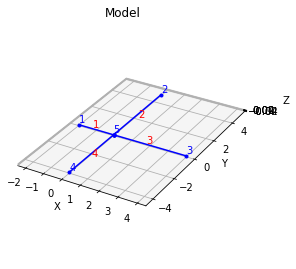

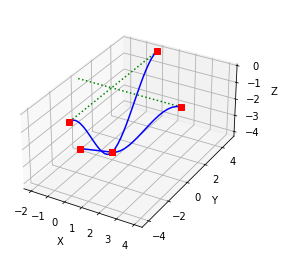

<Figure size 432x288 with 0 Axes>

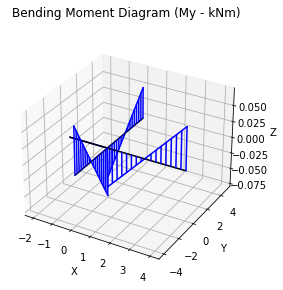

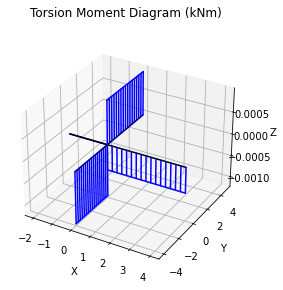

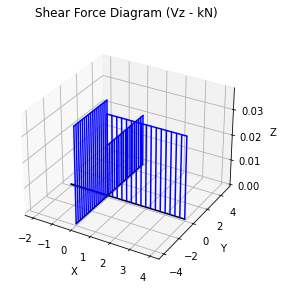

In [12]:
grid.plot_results();